In [18]:
import numpy as np
import matplotlib.pylab as plt
import utils as u
from datetime import datetime
from scipy.fftpack import dct
import cv2
from DCT import custom_dct2

In [19]:
# plot setting
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100

In [20]:
dimensions = [20, 40, 80, 160]

timing = {
    "HomeMade": [],  # timing with our method
    "FFT-c": [],  # timing with cv2 method
    "FFT-s": []  # timing with scipy method
}
timing2 = {
    "HomeMade": [],  # timing with our method
    "FFT-c": [],  # timing with cv2 method
    "FFT-s": []  # timing with scipy method
}
results = {
    "HomeMade": [],  # results with our method
    "FFT-c": [],  # results with cv2 method
    "FFT-s": []  # results with scipy method
}

In [21]:
for n in dimensions:
    print(n)
    matrix = np.random.randint(0, 256, size=(n, n))
    t0 = datetime.now()
    results["FFT-s"].append(dct(matrix, type=2))
    t1 = datetime.now()
    results["FFT-c"].append(cv2.dct(np.float32(matrix)))
    t2 = datetime.now()
    results["HomeMade"].append(custom_dct2(matrix))
    t3 = datetime.now()

    timing2["HomeMade"].append(t3 - t2)
    timing2["FFT-c"].append(t2 - t1)
    timing2["FFT-s"].append(t1 - t0)

timing2

20
40
80
160


{'HomeMade': [datetime.timedelta(microseconds=688700),
  datetime.timedelta(seconds=9, microseconds=974035),
  datetime.timedelta(seconds=165, microseconds=623137),
  datetime.timedelta(seconds=2563, microseconds=37592)],
 'FFT-c': [datetime.timedelta(0),
  datetime.timedelta(0),
  datetime.timedelta(0),
  datetime.timedelta(0)],
 'FFT-s': [datetime.timedelta(0),
  datetime.timedelta(0),
  datetime.timedelta(0),
  datetime.timedelta(microseconds=510)]}

In [23]:
for i in range(len(dimensions)):
    timing["HomeMade"].append(int(timing2["HomeMade"][i].total_seconds() * 1e6))
    timing["FFT-c"].append(int(timing2["FFT-c"][i].total_seconds() * 1e6))
    timing["FFT-s"].append(int(timing2["FFT-s"][i].total_seconds() * 1e6))

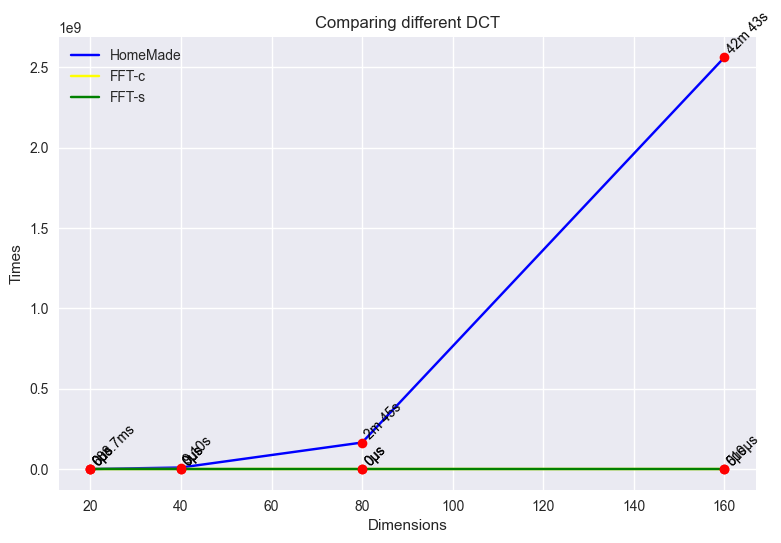

In [24]:
for type in timing:
    if type == "FFT-s":
        col = "green"
    elif type == "FFT-c":
        col = "yellow"
    elif type == "HomeMade":
        col = "blue"
    plt.plot(dimensions, timing[type], color=col, label=type)
    for i in range(len(dimensions)):
        plt.plot(dimensions[i], (timing[type][i]), color='red', marker='o')
        plt.text(dimensions[i], timing[type][i], u.printTime(
            timing[type][i]), color='black', ha='left', va="bottom", rotation=45)

plt.xlabel('Dimensions')
plt.ylabel('Times')
plt.title('Comparing different DCT')
plt.legend()
plt.show()

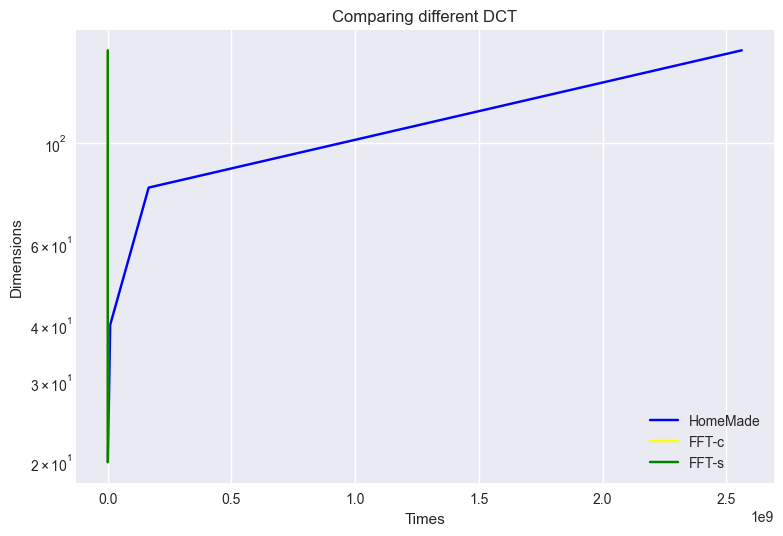

In [26]:
#type = "FFT"
for type in timing:
    if type == "FFT-s":
        col = "green"
    elif type == "FFT-c":
        col = "yellow"
    elif type == "HomeMade":
        col = "blue"
    plt.semilogy(timing[type], dimensions, color=col, label=type)
    #for i in range(len(dimensions)):
        #plt.plot(dimensions[i], (timing[type][i]), color='red', marker='o')
        #plt.text(dimensions[i], timing[type][i], u.printTime(timing[type][i]), color='black', ha='left', va="bottom", rotation=45)

plt.xlabel('Times')
plt.ylabel('Dimensions')
plt.title('Comparing different DCT')
plt.legend()
plt.show()

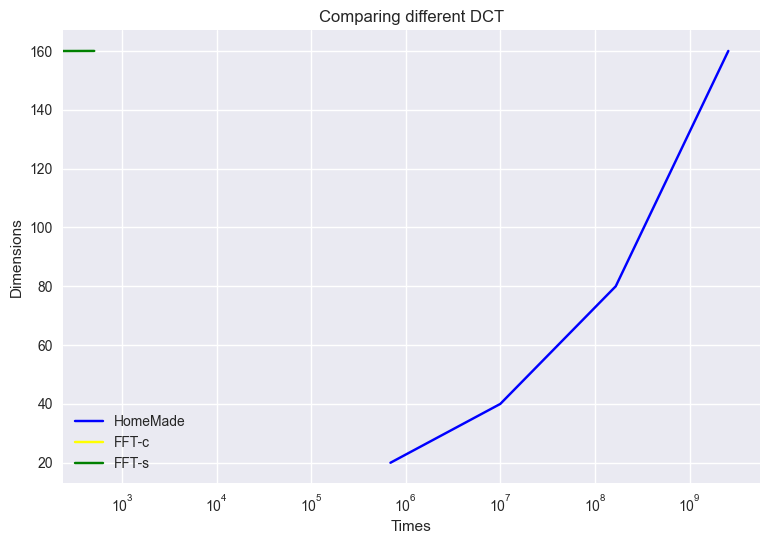

In [27]:
for type in timing:
    if type == "FFT-s":
        col = "green"
    elif type == "FFT-c":
        col = "yellow"
    elif type == "HomeMade":
        col = "blue"
    plt.semilogx(timing[type], dimensions, color=col, label=type)
    #for i in range(len(dimensions)):
        #plt.plot(dimensions[i], (timing[type][i]), color='red', marker='o')
        #plt.text(dimensions[i], timing[type][i], u.printTime(timing[type][i]), color='black', ha='left', va="bottom", rotation=45)

plt.xlabel('Times')
plt.ylabel('Dimensions')
plt.title('Comparing different DCT')
plt.legend()
plt.show()

In [ ]:
for type in timing:
    if type == "FFT-s":
        col = "green"
    elif type == "FFT-c":
        col = "yellow"
    elif type == "HomeMade":
        col = "blue"
    plt.semilogx(dimensions, timing[type], color=col, label=type)
    #for i in range(len(dimensions)):
        #plt.plot(dimensions[i], (timing[type][i]), color='red', marker='o')
        #plt.text(dimensions[i], timing[type][i], u.printTime(timing[type][i]), color='black', ha='left', va="bottom", rotation=45)

plt.xlabel('Times')
plt.ylabel('Dimensions')
plt.title('Comparing different DCT')
plt.legend()
plt.show()